## Building a Classifier

### Let's embed the data

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
KK_PATH = './'
# DATASET = 'code_blocks_tag_io.csv'
DATASET = 'chunks_30.csv'

In [3]:
# df = pd.read_csv(KK_PATH + 'code_blocks.csv', sep='\t')
# df = df.dropna()
# df = df.drop_duplicates()
# df = df.reset_index(drop=True)
# df['code_block_length'] = np.zeros(len(df))
# for i in range(len(df)):
#     df['code_block_length'][i] = len(df['code_block'][i])
#     print(str(i)+'\r', end='')
# df = df.drop(df[df['code_block_length'] > 512].index)
# df.shape
# df.to_csv(KK_PATH + 'code_blocks_prepared.csv', sep='\t', index=False)

In [4]:
# df = pd.read_csv(KK_PATH + 'code_blocks_prepared.csv', sep='\t')
# df.shape

In [5]:
df = pd.read_csv(KK_PATH + DATASET, sep='\t')

In [6]:
df.shape

(41055, 2)

In [7]:
def wordListToFreqDict(wordlist):
    def sortFreqDict(freqdict):
        aux = [(freqdict[key], key) for key in freqdict]
        aux.sort()
        aux.reverse()
        return aux
    wordfreq = [wordlist.count(p) for p in wordlist]
    return sortFreqDict(dict(list(zip(wordlist,wordfreq))))

In [8]:
# %%time
# wordListToFreqDict(df.code.to_string())

In [9]:
# %%time
# nl2ml = pd.read_csv(KK_PATH + 'nl2ml.csv')
# nl2ml = nl2ml.rename({'':'code_block', '':'method_tag'})
# nl2ml_vis = nl2ml[nl2ml['method_tag'] == 'Visualization']
# tokens_visualization = wordListToFreqDict(nl2ml_vis.code_block.to_string())

In [16]:
def tokens_search(df, tokens, new_column_name):
    df[new_column_name] = 0
    for i in range(len(df)):
        percents = str(round(100*i/len(df),1))
        print(percents + '%\r', end='')
        row = df['code'][i]
        for token in tokens:
            result = re.search(token, row)
            if result!=None:
                df[new_column_name][i] = 1
                break
    return df

#### Tag: Import-Output

In [17]:
# TAG: input_output
tokens_io = ['read', 'csv' , 'sql' , 'json' , 'png' , 'jpg' ,
          'tsv' , 'write' , 'open' , 'print' , 'output' ,
          'stdin' , 'stdout' , 'path' , 'dir'
#            , 'import'
          ]

In [18]:
%%time
df = tokens_search(df, tokens_io, 'tag_import_output')

C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Wall time: 12min 22s


In [33]:
df

,code,tag_import_output
0,import matplotlib.pyplot as plt\nimport seabor...,1
1,"cols = ['SalePrice', 'OverallQual', 'GrLivArea...",1
2,"res = stats.probplot(df_train['TotalBsmtSF'], ...",1
3,age_null_count = dataset['Age'].isnull().s...,0
4,dataset['Fare'] = dataset['Fare'].astype(i...,0
5,"def feature_importances(self,x,y):\n ...",1
6,"}gb_params = {\n 'n_estimators': 500,\n ...",1
7,",0.05965792 , 0.02774745, 0.07462718, 0.45...",0
8,"py.iplot(fig,filename='scatter2010')trace = go...",0
9,"sizemode = 'diameter',\n sizere...",0


In [24]:
df.to_csv(KK_PATH + 'chunks_30_tag_io.csv', index=False)

#### Tag: Visualization

In [35]:
tokens_visualization = ['plot', 'hist', 'sns.', 'plt.']

In [36]:
%%time
df = tokens_search(df, tokens_visualization, 'tag_visualization')

C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Wall time: 10min 35s


In [37]:
df

,code,tag_import_output,tag_visualization
0,import matplotlib.pyplot as plt\nimport seabor...,1,1
1,"cols = ['SalePrice', 'OverallQual', 'GrLivArea...",1,1
2,"res = stats.probplot(df_train['TotalBsmtSF'], ...",1,1
3,age_null_count = dataset['Age'].isnull().s...,0,0
4,dataset['Fare'] = dataset['Fare'].astype(i...,0,1
5,"def feature_importances(self,x,y):\n ...",1,0
6,"}gb_params = {\n 'n_estimators': 500,\n ...",1,0
7,",0.05965792 , 0.02774745, 0.07462718, 0.45...",0,0
8,"py.iplot(fig,filename='scatter2010')trace = go...",0,1
9,"sizemode = 'diameter',\n sizere...",0,1


In [38]:
df.to_csv(KK_PATH + 'chunks_30_tags.csv', index=False)

#### Tag: Image Augmentation

### TF-IDF + Log Reg

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('chunks_30_tags.csv')

In [3]:
corpus = df['code']
train_corpus = df['code'][0:30000]
test_corpus = df['code'][30000:]

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=5
                        , max_df = 0.3
                        , ngram_range = (1,2)
                        , smooth_idf = True
                       )
features = tfidf.fit_transform(corpus)
# for_pred = tfidf.transform(test_corpus)

In [7]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(features[0:len(df['tag_import_output'])], df['tag_import_output'], test_size=0.25)
clf = LogisticRegression(random_state=4321).fit(X_train, y_train)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print(f'Mean Accuracy {round(accuracy*100, 2)}%')
print(f'F1-score {round(metrics.f1_score(y_pred, y_test)*100, 2)}%')

C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Mean Accuracy 87.01%
F1-score 90.33%
Wall time: 17 s


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


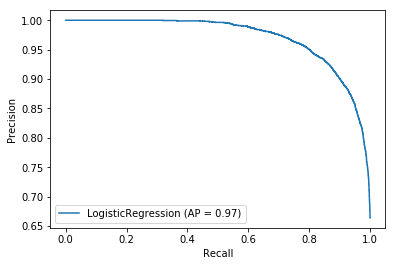

In [17]:
metrics.plot_precision_recall_curve(clf, X_test, y_test)

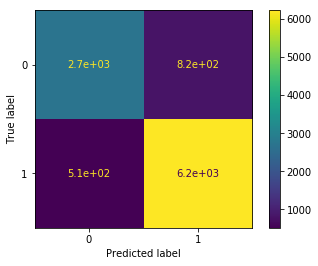

In [14]:
metrics.plot_confusion_matrix(clf, X_test, y_test)

### TF-IDF + SVM

### TF-IDF + Naive Bayes

### Word2Vec

### Code2Vec